## 简介&库

以《斗破苍穹》为例，实施语言模型

In [1]:
import numpy as np
import pandas as pd
import re                                                        # 用于识别非中文并过滤
import jieba                                                     # 用于句子分词
import seaborn as sns                                           # 可视化

## 文本预处理

In [81]:
# 自定义方法，读取文本
def get_TxtText(filepath):
    str_textO = ''
    with open(filepath, 'rb')as f:
        str_textO += f.read().decode('utf-8')
    return str_textO

# test 'get_TxtText' method
str_TextOrg = get_TxtText('../Data/FBS.txt')
str_TextOrg[:300]

'《斗破苍穹》天蚕土豆\r\n\r\n严正声明：本书为丫丫小说网(www.shuyaya.com)的用户上传至其在本站的存储空间，本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。\r\n在线阅读：http://www.shuyaya.com/read/18/\r\n--------------------------------------------------\r\n\r\n第一章 陨落的天才\r\n\r\n    “斗之力，三段！”\r\n\r\n    望着测验魔石碑上面闪亮得甚至有些刺眼的五个大字，少年面无表情，唇角有着一抹自嘲，紧握的手掌，因为大力，而导致略微尖锐的指甲深深的刺进了掌'

### 断句

In [82]:
# 自定义方法，断句
## 定义句子结束符号，遍历文本，如果当前字符是结束符号，则断句并附加到list
def get_TextSenteces(text):
    lst_punt = "!?。！？\n\r"                                # 句子结束符号
    lst_senteces = []                                        # 储存断句结果
    start = 0                                                # 句子开头光标位置
    text += '#'
    for i in range(len(text)):
        if text[i] in lst_punt and text[i+1] not in lst_punt:
            lst_senteces.append(text[start:i+1].strip())
            start = i+1
    return lst_senteces
            
# test 'get_TextSenteces' method
s = '《斗破苍穹》天蚕土豆严正声明：本书为丫丫小说网(www.shuyaya.com)的用户上传至其在本站的存储空间。\
本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。'
print(get_TextSenteces(s))

['《斗破苍穹》天蚕土豆严正声明：本书为丫丫小说网(www.shuyaya.com)的用户上传至其在本站的存储空间。', '本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。']


In [83]:
lst_TextSentece = get_TextSenteces(str_TextOrg)
lst_TextSentece[:10]

['《斗破苍穹》天蚕土豆',
 '严正声明：本书为丫丫小说网(www.shuyaya.com)的用户上传至其在本站的存储空间，本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。',
 '在线阅读：http://www.shuyaya.com/read/18/',
 '--------------------------------------------------',
 '第一章 陨落的天才',
 '“斗之力，三段！',
 '”',
 '望着测验魔石碑上面闪亮得甚至有些刺眼的五个大字，少年面无表情，唇角有着一抹自嘲，紧握的手掌，因为大力，而导致略微尖锐的指甲深深的刺进了掌心之中，带来一阵阵钻心的疼痛…',
 '“萧炎，斗之力，三段！',
 '级别：低级！']

### 仅保留中文并导出文件

In [84]:
#自定义方法，利用re过滤文本：只保留中文
def get_SenOnlyCN(lst_sens):
    lst_cs = []
    pat_notCN = re.compile(u'[^\u4E00-\u9FA5]')             # re通配符，适配非中文
    for sen in lst_sens:
        c_sen = pat_notCN.sub(r'', sen)                     # 将非中文字符替换为空
        if len(c_sen)>0:
            lst_cs.append(c_sen)
    return lst_cs
            
# test 'get_TextSenteces' method
s = ['《斗破苍穹》天蚕土豆严正声明：本书为丫丫小说网(www.shuyaya.com)的用户上传至其在本站的存储空间。',
     '本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。']
print(get_SenOnlyCN(s))

['斗破苍穹天蚕土豆严正声明本书为丫丫小说网的用户上传至其在本站的存储空间', '本站只提供全集电子书存储服务以及免费下载服务以下作品内容之版权与本站无任何关系']


In [86]:
lst_SenOnlyCN = get_SenOnlyCN(lst_TextSentece)
lst_SenOnlyCN[:8]

['斗破苍穹天蚕土豆',
 '严正声明本书为丫丫小说网的用户上传至其在本站的存储空间本站只提供全集电子书存储服务以及免费下载服务以下作品内容之版权与本站无任何关系',
 '在线阅读',
 '第一章陨落的天才',
 '斗之力三段',
 '望着测验魔石碑上面闪亮得甚至有些刺眼的五个大字少年面无表情唇角有着一抹自嘲紧握的手掌因为大力而导致略微尖锐的指甲深深的刺进了掌心之中带来一阵阵钻心的疼痛',
 '萧炎斗之力三段',
 '级别低级']

In [88]:
# 导出文件
with open('../Data/cleaned_FBS.txt', 'w')as f:
    for sen in lst_SenOnlyCN:
        f.write(sen+'\n')
        
# test 'cleaned' file 
with open('../Data/cleaned_FBS.txt', 'r')as f:
    for i in range(8):
          print(f.readline())

斗破苍穹天蚕土豆

严正声明本书为丫丫小说网的用户上传至其在本站的存储空间本站只提供全集电子书存储服务以及免费下载服务以下作品内容之版权与本站无任何关系

在线阅读

第一章陨落的天才

斗之力三段

望着测验魔石碑上面闪亮得甚至有些刺眼的五个大字少年面无表情唇角有着一抹自嘲紧握的手掌因为大力而导致略微尖锐的指甲深深的刺进了掌心之中带来一阵阵钻心的疼痛

萧炎斗之力三段

级别低级



### 结巴分词

In [2]:
# 读取cleaned文件
lst_TextOnlyCN = []
with open('../Data/cleaned_FBS.txt', 'r')as f:
    for sen in f.readlines():
        lst_TextOnlyCN.append(sen.strip())

# test 'lst_TextOnlyCN'
lst_TextOnlyCN[:8]

['斗破苍穹天蚕土豆',
 '严正声明本书为丫丫小说网的用户上传至其在本站的存储空间本站只提供全集电子书存储服务以及免费下载服务以下作品内容之版权与本站无任何关系',
 '在线阅读',
 '第一章陨落的天才',
 '斗之力三段',
 '望着测验魔石碑上面闪亮得甚至有些刺眼的五个大字少年面无表情唇角有着一抹自嘲紧握的手掌因为大力而导致略微尖锐的指甲深深的刺进了掌心之中带来一阵阵钻心的疼痛',
 '萧炎斗之力三段',
 '级别低级']

In [3]:
%%time
# 分词
lst_cutWords = [list(jieba.cut(sen)) for sen in lst_TextOnlyCN]

# test 'lst_cutWords' (cut word results)
lst_cutWords[5],lst_cutWords[6], lst_cutWords[7]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.916 seconds.
Prefix dict has been built succesfully.


(['望',
  '着',
  '测验',
  '魔',
  '石碑',
  '上面',
  '闪亮',
  '得',
  '甚至',
  '有些',
  '刺眼',
  '的',
  '五个',
  '大字',
  '少年',
  '面',
  '无表情',
  '唇角',
  '有着',
  '一抹',
  '自嘲',
  '紧握',
  '的',
  '手掌',
  '因为',
  '大力',
  '而',
  '导致',
  '略微',
  '尖锐',
  '的',
  '指甲',
  '深深',
  '的',
  '刺进',
  '了',
  '掌心',
  '之中',
  '带来',
  '一阵阵',
  '钻心',
  '的',
  '疼痛'],
 ['萧炎', '斗之力', '三段'],
 ['级别', '低级'])

## 语言模型-简单
1.分割数据集为训练集测试集               
2.对训练集进行二元、三元模型的分割并计数                
3.对测试集进行二元、三元模型的分割，并计算p（sentence）             
4.计算测试集迷惑度$perplexity = 2^{-l}, l = \frac{1}{M} \sum_{i=1}^m log(p(s_i)), M是测试集词汇量$ 

### 分割为训练集测试集

In [5]:
# 自定义方法，分割数据集
def get_TrainTes(lst_cws,train_size):
    int_senNum = len(lst_cws)                                                     # 有多少句子
    perm = np.random.permutation(int_senNum)                                      # 随机序列
    size = int(int_senNum*train_size)
    ary_cws = np.array(lst_cws)                                                   # 矩阵化

    lst_train = ary_cws[perm][:size]
    lst_test = ary_cws[perm][size:]
    
    return lst_train, lst_test
# test 'get_TrainTes' method
s = [['斗破', '苍穹'], ['在线', '阅读'],['天蚕','土豆'],['我','要'],['这天','遮不住']]
print(s)
ts = 0.7
train, test = get_TrainTes(s,ts)
print(train)
print(test)
# print(list(train[0]))

[['斗破', '苍穹'], ['在线', '阅读'], ['天蚕', '土豆'], ['我', '要'], ['这天', '遮不住']]
[['天蚕' '土豆']
 ['我' '要']
 ['斗破' '苍穹']]
[['这天' '遮不住']
 ['在线' '阅读']]


In [6]:
train_size = 0.7
ary_train, ary_test = get_TrainTes(lst_cutWords,train_size)
len(ary_train), len(ary_test)

(92459, 39626)

### 对训练集建模二元、三元

In [7]:
"""
缺点：
略显臃肿。
对于训练集其实不需要ngrams_model(返回变量 n)
对于测试集其实不需要数量统计（返回变量 d）
"""
# 自定义方法，获得添加开始符号以及结束符号的分词结果
def get_ngramsModel(ary_cws, ngram):
    ngrams_model, sen = [], []                                         # ngram总模型，ngram当前模型结果
    d_cmn = {}                                                         # 模型数量统计
    i_tn = 0                                                           # 文本分词总词数
    for sle_ary in ary_cws:
        sen = list(sle_ary)
        ## 在列表开头插入n-1个星号
        for i in range(ngram-1):
            sen.insert(0, '*')
        ## 在列表末尾插入1个星号
        sen.append('#')
        
        # 自定义方法，获得ngram分组的列表
        get_ngramsLst = lambda lst_cws, n : zip(*[lst_cws[i:] for i in range(n)])
        
        sen = list(get_ngramsLst(sen, ngram))
        
        for m in sen:
            d_cmn[m] = d_cmn.get(m, 0) + 1
            i_tn += 1
            
        ngrams_model.append(sen)
    return ngrams_model, d_cmn, i_tn
        
# test 'get_ngramsModel' method
s= [['斗破', '苍穹'], ['在线', '阅读'],['天蚕','土豆'],['我','要'],['这天','遮不住'],['天蚕','土豆'],['我','要'],['这天','遮不住']]
n,d, i = get_ngramsModel(np.array(s),3)
print(n)
print(d)
print(i)

[[('*', '*', '斗破'), ('*', '斗破', '苍穹'), ('斗破', '苍穹', '#')], [('*', '*', '在线'), ('*', '在线', '阅读'), ('在线', '阅读', '#')], [('*', '*', '天蚕'), ('*', '天蚕', '土豆'), ('天蚕', '土豆', '#')], [('*', '*', '我'), ('*', '我', '要'), ('我', '要', '#')], [('*', '*', '这天'), ('*', '这天', '遮不住'), ('这天', '遮不住', '#')], [('*', '*', '天蚕'), ('*', '天蚕', '土豆'), ('天蚕', '土豆', '#')], [('*', '*', '我'), ('*', '我', '要'), ('我', '要', '#')], [('*', '*', '这天'), ('*', '这天', '遮不住'), ('这天', '遮不住', '#')]]
{('*', '*', '斗破'): 1, ('*', '斗破', '苍穹'): 1, ('斗破', '苍穹', '#'): 1, ('*', '*', '在线'): 1, ('*', '在线', '阅读'): 1, ('在线', '阅读', '#'): 1, ('*', '*', '天蚕'): 2, ('*', '天蚕', '土豆'): 2, ('天蚕', '土豆', '#'): 2, ('*', '*', '我'): 2, ('*', '我', '要'): 2, ('我', '要', '#'): 2, ('*', '*', '这天'): 2, ('*', '这天', '遮不住'): 2, ('这天', '遮不住', '#'): 2}
24


In [8]:
%%time
# 训练集模型计数
lst_trainTri, dct_trainCountTri,int_trainTriNum = get_ngramsModel(ary_train, 3)
lst_trainBi, dct_trainCountBi,int_trainBiNum = get_ngramsModel(ary_train, 2)
lst_trainUni, dct_trainCountUni,int_trainUniNum = get_ngramsModel(ary_train, 1)

print(len(dct_trainCountTri), len(dct_trainCountBi), len(dct_trainCountUni))
print(int_trainTriNum, int_trainBiNum, int_trainUniNum)

print(sorted([(v, k)  for k, v in dct_trainCountTri.items() if v>10], key = lambda t:t[0], reverse=True)[:10])

1342370 640083 56717
1994836 1994836 1994836
[(5361, ('*', '*', '萧炎')), (3076, ('*', '*', '在')), (1634, ('*', '*', '望')), (1603, ('*', '望', '着')), (1511, ('点', '了', '点头')), (1460, ('望', '着', '那')), (1437, ('*', '*', '闻言')), (1329, ('*', '*', '这')), (1242, ('*', '*', '见到')), (1133, ('的', '望', '着'))]
Wall time: 7.25 s


Text(0, 0.5, 'frequency')

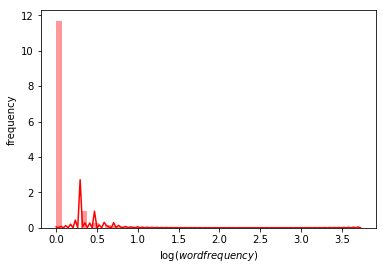

In [9]:
# 训练集模型计数可视化
ax = sns.distplot(np.log10([t for t in dct_trainCountTri.values()]), color='red')
ax.set_xlabel(r'$\log(word frequency)$')
ax.set_ylabel(r'frequency')

### 对测试集建模三元
- 测试集只需要model（用于索引）

In [10]:
# ary_test
lst_testTri, dct_testCountTri,int_testTriNum = get_ngramsModel(ary_test, 3)
lst_testBi, dct_testCountBi,int_testBiNum = get_ngramsModel(ary_test, 2)

In [26]:
# 自定义方法，获取分好词的文本中p(s_i)，
def get_pSen(lst_ngram, d_countNgrams, d_countN_1grams):
    lst_p = []
    
    for l in lst_ngram:
        p = 1                                                       # p初始化
        for ng in l:
            if ng[0]=='*':   bi = ng[1:]
            else:            bi = ng[0:2]
#             print(ng, bi)
            mol, deno = d_countNgrams.get(ng, None), d_countN_1grams.get(bi, None)
#             print('```',mol, deno)
            if mol!=None and deno!=None:
                p *= round(mol/deno, 5)
#                 print('\t',ng,bi ,mol/deno, p)
            else:
                p = 0
                break
                
#         print(lst_ngram.index(l), p)
        lst_p.append(p)
    return lst_p

# test 'get_pSen' method
l = [['第一章', '陨落', '的', '天才'],['斗之力', '三段'],['望','着','测验','魔','石碑','上面','闪亮','得','甚至','有些','刺眼','的','五个',\
'大字','少年','面无表情','唇角','有着','一抹','自嘲','紧握','的','手掌','因为','大力','而','导致','略微','尖锐','的','指甲','深深','的',\
'刺进','了','掌心','之中','带来','一阵阵','钻心','的','疼痛']]

n, d, i = get_ngramsModel(l,3)

lst_pSen = get_pSen(n, dct_trainCountTri, dct_trainCountBi)
lst_pSen

[0.0098043464, 0, 0]

In [27]:
lst_pSenTri = get_pSen(lst_testTri, dct_trainCountTri, dct_trainCountBi)
lst_pSenTri[:10]

[0, 0, 0, 0, 0, 0, 0.0015870978, 0, 0, 0]

### 迷惑度
$perplexity = 2^{-l}, l = \frac{1}{M} \sum_{i=1}^m log(p(s_i)), M是测试集词汇量$ 

In [29]:
# 单词总数
int_TestWordsNum = np.sum([len(l) for l in ary_test])
int_TestWordsNum

812715

In [45]:
# 自定义方法，计算测试集迷惑度
def get_perplexity(l_p, M):
    perp = 0
    for p in l_p:
        if not p:
            perp += 0
            continue
        perp += np.log2(p)
    perp /= M
    
    return 2**(-perp)

# test 'get_perplexity' method
l = [0.5, 0.25,0,0.125,0,0.0625,0,0.03125]
i_ps = get_perplexity(l, 10)
i_ps

2.8284271247461903

In [46]:
int_perpSenTri = get_perplexity(lst_pSenTri, int_TestWordsNum)
int_perpSenTri

1.023274837149308